# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [39]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Dataset

In [8]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

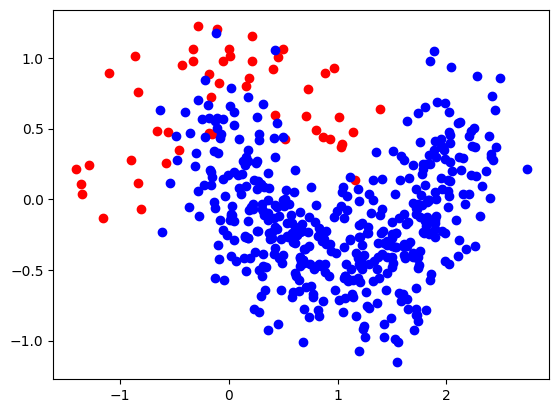

In [38]:
plt.plot(X[:,0][Y==0], X[:,1][Y==0], "ro")
plt.plot(X[:,0][Y==1], X[:,1][Y==1], "bo")

## Training

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) #70/30 train/test split

In [73]:
from sklearn.neighbors import KNeighborsClassifier

k=3
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train) # use KNN with k = 3

y_pred = neigh.predict(X_test)
np.mean((y_pred-Y_test)**2)**0.5 # rmse

0.21602468994692867

## Testing / Optimization

In [92]:
least_rmse = 10
optimal_k = 0
# find the k-value that minimizes the rmse
for k in range(2,20):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train) # model with value k
    y_pred = neigh.predict(X_test)

    if np.mean((y_pred-Y_test)**2)**0.5 < least_rmse: 
        least_rmse = np.mean((y_pred-Y_test)**2)**0.5
        optimal_k = k

neigh = KNeighborsClassifier(n_neighbors=optimal_k).fit(X_train, Y_train)
print(optimal_k)
print(least_rmse)

4
0.2


## Performance Analysis

In [91]:
from sklearn import metrics
print("Train set accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(Y_test, y_pred))

print("mean absolute error", np.mean(np.abs(neigh.predict(X_test)-Y_test)))
print("mean error: ", np.mean(neigh.predict(X_test)-Y_test))

Train set accuracy:  0.98
Test set accuracy:  0.9466666666666667
mean absolute error 0.04
mean error:  0.013333333333333334


I used KNN to classify the points with regards to which "moon" they were a part of. To decide on the value of K, I iterated through the first 20 numbers of so to find the K-value that resulted in the least root mean square error. Then, I found that k = 4 was the optimal value. To see how well this classification model performed, I used metrics.accuracy_score() to see how well it performed on both the train data and the test data. These values were close to 1, signifying that the model was doing well. I confirmed this using the mean absolute error and the mean error as these values were close to zero, meaning that the error was minimal. Overall, using KNN to classify the moons worked really well.